## [Exercise](https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises)

[Continued...]

### 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
import torchvision
from torch import nn
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [ ]:
train_data = datasets.MNIST(root = "data",
                            train = True,
                            download = True,
                            transform = torchvision.transforms.ToTensor(),
                            target_transform = None)

test_data = datasets.MNIST(root = "data",
                           train = False,
                           download = True,
                           transform = torchvision.transforms.ToTensor(),
                           target_transform = None)

100%|██████████| 9912422/9912422 [00:00<00:00, 130793876.92it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 77800702.52it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45370933.52it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 18441944.60it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
class_name = train_data.classes
class_name, len(class_name)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 10)

In [ ]:
# Mapping classes to dictionary indices
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
print(f'Image Shape: {image.shape}, label class_name and output shape: {class_name[label], label}')

Image Shape: torch.Size([1, 28, 28]), label class_name and output shape: ('5 - five', 5)


### 6. Visualize at least 5 different samples of the MNIST training dataset.

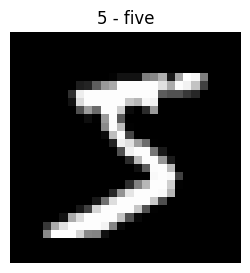

In [ ]:
plt.figure(figsize = (3, 3))
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_name[label])
plt.axis(False);

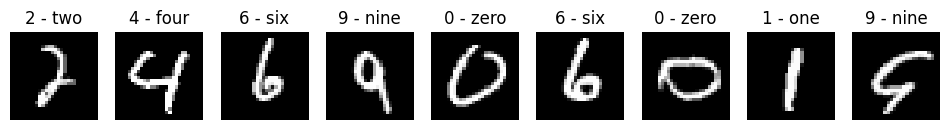

In [ ]:
# PLotting more images
fig = plt.figure(figsize = (12, 5))
rows, cols = 1, 9

for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")    # cmap="gray" to generate image on grayscale
  plt.title(class_name[label])
  plt.axis(False);

### 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

(1875, 313)

### 8. Recreate `model_2` used in the  [00_PyTorch_Computer_Vision.ipynb](https://github.com/LuluW8071/Data-Science/blob/main/Pytorch/03_PyTorch_Computer_Vision/00_PyTorch_Computer_Vision.ipynb) (the same model from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
class MNISTModel(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units *7*7,
                  output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)

# Setting device cpu at first
device = "cpu"
model = MNISTModel(1, 10, len(class_name)).to(device)
model, next(model.parameters()).device

(MNISTModel(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 device(type='cpu'))

### 9. Train the model on CPU and GPU and see how long it takes on each.

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 3.5 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task = 'multiclass',
                                 num_classes = len(class_name)).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.01)

In [ ]:
# Train and Test function

def train(model, data_loader, loss_fn, optimizer, torchmetrics_accuracy, device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += torchmetrics_accuracy(y,
                                       y_pred.argmax(dim = 1)) * 100
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} --- Train acc: {train_acc:.2f}%")

def test(model, data_loader, loss_fn, optimizer, torchmetrics_accuracy, device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += torchmetrics_accuracy(y,
                                        test_pred.argmax(dim = 1)) * 100

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss: {test_loss:.4f} --- Test acc: {test_acc:.2f}%')

In [ ]:
from timeit import default_timer as timer

# Timer function
def train_time(start, end, device):
  total_time = end - start
  print(f'Trained on {device}: {total_time:.3f} seconds')
  return total_time

In [ ]:
torch.manual_seed(42)

from tqdm.auto import tqdm

train_time_start_cpu= timer()

# Train/test loop
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train(model, train_dataloader,
        loss_fn, optimizer,
        torchmetrics_accuracy,
        device)
  test(model, test_dataloader,
       loss_fn, optimizer,
       torchmetrics_accuracy,
       device)

train_time_end_cpu = timer()
total_train_time_model_cpu = train_time(train_time_start_cpu,
                                        train_time_end_cpu,
                                        device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.2879 --- Train acc: 90.35%
Test loss: 0.1256 --- Test acc: 96.06%
Epoch: 1
Train loss: 0.1203 --- Train acc: 96.30%
Test loss: 0.1033 --- Test acc: 96.77%
Epoch: 2
Train loss: 0.1115 --- Train acc: 96.56%
Test loss: 0.0958 --- Test acc: 96.94%
Trained on cpu: 126.688 seconds


In [ ]:
# Evaluate Model and Prediction on CPU
torch.manual_seed(42)

def eval_model(model, data_loader, loss_fn,
               accuracy, device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += torchmetrics_accuracy(y,
                                   y_pred.argmax(dim = 1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc.item()}

In [ ]:
# Evaluation of model on cpu
model_cpu_results = eval_model(model, test_dataloader, loss_fn,
                               torchmetrics_accuracy, device)

model_cpu_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModel',
 'model_loss': 0.09580861777067184,
 'model_acc': 0.9694488644599915}

In [ ]:
# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Calling instance of model on GPU
model_gpu = MNISTModel(1, 10, len(class_name)).to(device)
model_gpu, next(model_gpu.parameters()).device

cuda


(MNISTModel(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 device(type='cuda', index=0))

In [ ]:
from torchmetrics import Accuracy

accuracy = Accuracy(task = 'multiclass',
                    num_classes = len(class_name)).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_gpu.parameters(), lr = 0.01)

In [ ]:
torch.manual_seed(42)

train_time_start_gpu= timer()

# Train/test loop on GPU
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train(model_gpu, train_dataloader,
        loss_fn, optimizer,
        accuracy,
        device)
  test(model_gpu, test_dataloader,
       loss_fn, optimizer,
       accuracy,
       device)

train_time_end_gpu = timer()
total_train_time_model_gpu = train_time(train_time_start_gpu,
                                        train_time_end_gpu,
                                        device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.1805 --- Train acc: 94.41%
Test loss: 0.0902 --- Test acc: 97.40%
Epoch: 1
Train loss: 0.0993 --- Train acc: 97.03%
Test loss: 0.0824 --- Test acc: 97.23%
Epoch: 2
Train loss: 0.0900 --- Train acc: 97.27%
Test loss: 0.0866 --- Test acc: 97.16%
Trained on cuda: 53.016 seconds


In [ ]:
# Evaluate Model and Prediction on GPU
torch.manual_seed(42)
model_gpu_results = eval_model(model_gpu.to('cpu'), test_dataloader, loss_fn, accuracy, device)

model_gpu_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModel',
 'model_loss': 0.08661975711584091,
 'model_acc': 0.9716453552246094}

In [ ]:
# Comapring results of model trained on cpu and gpu
import pandas as pd

compare_results = pd.DataFrame([model_cpu_results, model_gpu_results])
compare_results['model_acc'] = compare_results['model_acc'] * 100
compare_results

,model_name,model_loss,model_acc
0,MNISTModel,0.095809,96.944886
1,MNISTModel,0.086620,97.164536


In [ ]:

# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_cpu,
                                    total_train_time_model_gpu]
compare_results


,model_name,model_loss,model_acc,training_time
0,MNISTModel,0.095809,96.944886,126.687665
1,MNISTModel,0.086620,97.164536,53.016084


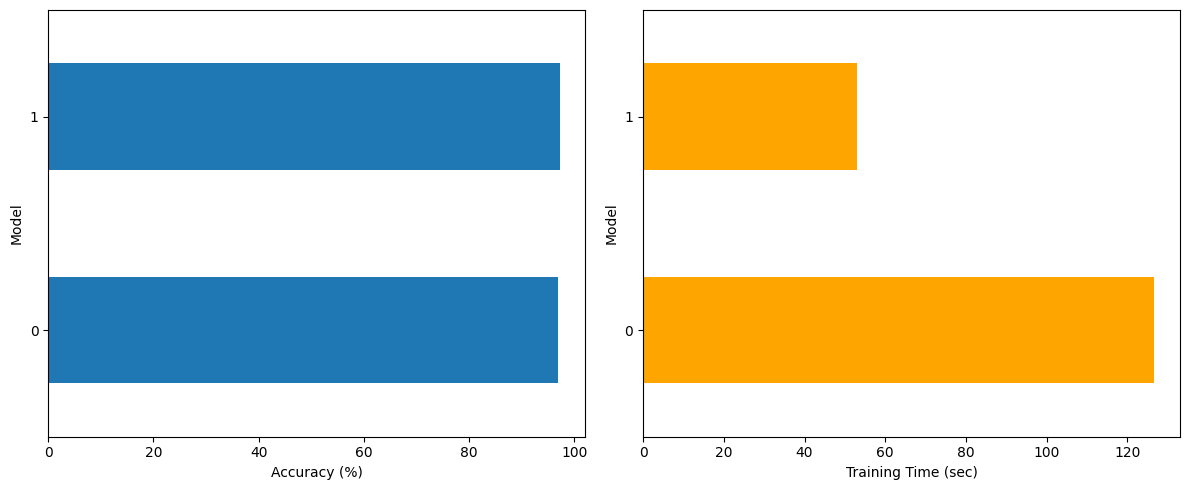

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
compare_results['model_acc'].plot(kind="barh", ax=axes[0])
axes[0].set_xlabel("Accuracy (%)")
axes[0].set_ylabel("Model")

compare_results['training_time'].plot(kind="barh", ax=axes[1], color='orange')
axes[1].set_xlabel("Training Time (sec)")
axes[1].set_ylabel("Model")
plt.tight_layout()

# Show the plot
plt.show()

### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

In [ ]:
def make_predictions(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 12):
  test_samples.append(sample)
  test_labels.append(label)

In [ ]:
# Make Predictions
pred_probs = make_predictions(model_gpu,
                              test_samples,
                              device)

# Convert prediction proabbilities to labels
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes, test_labels, sep = '\n')

tensor([2, 3, 6, 2, 4, 4, 5, 3, 7, 3, 1, 1])
[2, 3, 6, 2, 4, 4, 5, 3, 7, 3, 1, 1]


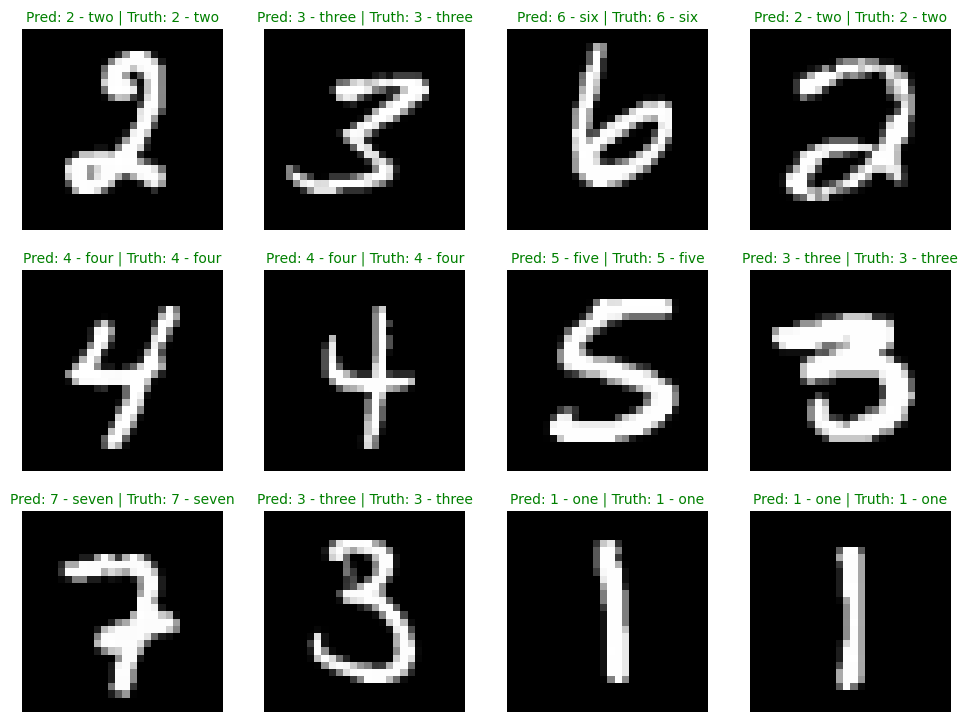

In [ ]:
# Plot predictions
plt.figure(figsize = (12, 12))
nrows, ncols = 4, 4
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap = "gray")

  pred_label = class_name[pred_classes[i]]
  truth_label = class_name[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check equality between pred and truth and change color of title
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c="g")
  else:
    plt.title(title_text, fontsize = 10, c="r")

  plt.axis(False);

### 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
from tqdm.auto import tqdm

# Make prediciton with trained model
y_preds = []
model_gpu.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader,
                   desc = "Making predictions...\t"):
    X, y = X.to(device), y.to(device)
    y_logits = model_gpu(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim = 0).argmax(dim = 1 )
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10], len(y_pred_tensor)

Making predictions...	:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([7, 2, 1, 0, 4, 1, 8, 9, 8, 9]), 10000)

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


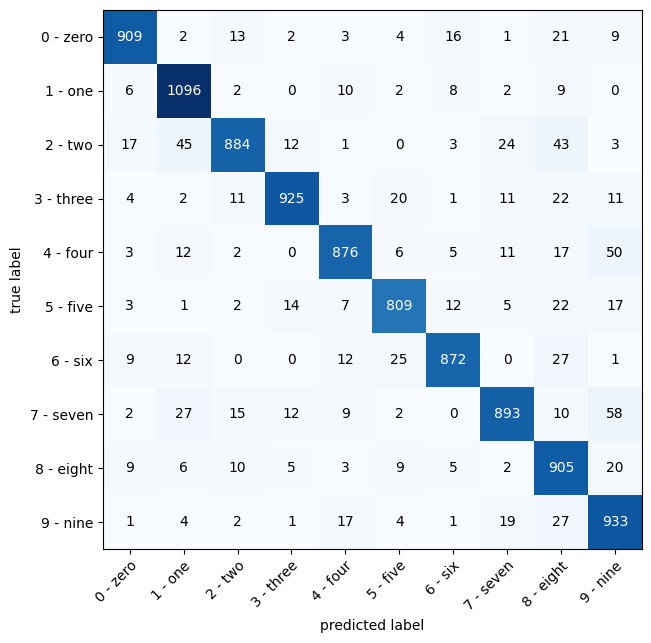

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_name), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names = class_name, # turn the row and column labels into class names
    figsize = (10, 7)
);

### 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `*nn.Conv2d()*` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [ ]:
torch.manual_seed(42)

images = torch.randn(1, 3, 64, 64)
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n{test_image}')

Image batch shape: torch.Size([1, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7

In [ ]:
torch.manual_seed(42)

# Define a convolutional layer with different kernel_size settings
conv1 = nn.Conv2d(in_channels=3, out_channels=len(class_name), kernel_size=3, stride=1, padding=0)
conv2 = nn.Conv2d(in_channels=3, out_channels=len(class_name), kernel_size=5, stride=1, padding=0)
conv3 = nn.Conv2d(in_channels=3, out_channels=len(class_name), kernel_size=7, stride=1, padding=0)

# Pass the random tensor through each convolutional layer
output1 = conv1(test_image)
output2 = conv2(test_image)
output3 = conv3(test_image)

# Print the shapes of the output tensors
print("Output shape with kernel_size=3:", output1.shape)
print("Output shape with kernel_size=5:", output2.shape)
print("Output shape with kernel_size=7:", output3.shape)

Output shape with kernel_size=3: torch.Size([10, 62, 62])
Output shape with kernel_size=5: torch.Size([10, 60, 60])
Output shape with kernel_size=7: torch.Size([10, 58, 58])


The `kernel_size` in a *convolutional layer* is like a filter that scans an image. When the filter is larger, it sees a bigger portion of the image at once. If you use larger filters, the output image (feature map) becomes smaller. This is because larger filters capture more global information and condense it.

<img src = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif">

Imagine looking at a picture through a small window (small filter) and then looking at the same picture through a larger window (large filter). With the larger window, you see more of the overall scene, but details might become less clear. Similarly, in a neural network, using larger filters helps capture broader patterns at the cost of losing some fine details.

So, in summary, adjusting the `kernel_size` helps control how much local versus global information the neural network pays attention to.

## Extra-curriculum

- **Watch**: [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.

- Spend 10-minutes clicking thorugh the different options of the [PyTorch vision library](https://pytorch.org/vision/stable/index.html), what different modules are available?

- Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library? What do you think you could do with these?

- For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the [PyTorch Image Models library *timm*](https://github.com/rwightman/pytorch-image-models/) (Torch Image Models) by Ross Wightman.